<b>June 24, 2025 • 09:05 AM</b>

In [63]:
#!/usr/bin/env python3
# Panutad Sirikul (French)
# 650510714
# customer_relationship_management
# 229496 Sec DS

# **Thai NLP Categorization Project**

1. Read some admin's remark on problem report
2. Categorize Problem (New Feature) according to keyword in report
3. Manual category checking
4. Presentation slides for CEO

<div class="alert alert-block alert-info">
<b>Note:</b> Use Microsoft Teams for chatting with supervisor for tips and notes</div>

### **Importing Dataset**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [65]:
# To print all columns
#pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [66]:
# To display the full text in a pandas DataFrame
#pd.set_option("display.max_colwidth", None) # Show full text in each cell

In [67]:
data = pd.read_csv("report_problem_raw.csv")
data

,report_problem_id,professional_id,problem_group,problem_name,report_date,remark
0,7714,1753,คืนงาน / ไม่เข้าให้บริการ,คืนงาน (กะทันหัน),2022-01-01 00:00:00,คุณแม่บ้านคืนงาน smart world แจ้งไม่สะบายค่ะ \...
1,7715,5033,อื่น ๆ,อื่น ๆ,2022-01-01 00:00:00,คุณลุกค้าแจ้งเรื่องเข้ามาว่า คุณแม่บ้านได้โทรห...
2,7716,2363,"ทรัพย์สิน ""เสียหาย""",ทำทรัพย์สินของลูกค้าเสียหาย,2022-01-01 00:00:00,คุณลูกค้าแจ้งว่า คุณแม่บ้านเปิดปิดประตูมุ้งลวด...
3,7717,4379,คืนงาน / ไม่เข้าให้บริการ,คืนงาน (กะทันหัน),2022-01-01 00:00:00,เนื่องจากคุณแม่บ้านกดหัวใจให้คุณลูกค้างานจึงเข...
4,7718,5126,"ทรัพย์สิน ""เสียหาย""",ทำทรัพย์สินของลูกค้าเสียหาย,2022-01-01 00:00:00,5126 : Punika Jantanop คุณลูกค้าแจ้งเข้ามาว่...
...,...,...,...,...,...,...
27588,36346,11979,คืนงาน / ไม่เข้าให้บริการ,คืนงาน (โครงการป้อนงานคุณแม่บ้าน),2025-05-31 19:16:00,คุณแม่บ้านไม่สะดวกเข้าให้บริการค่ะ
27589,36347,7992,คุณภาพการให้บริการ,ทำความสะอาดไม่เรียบร้อย,2025-05-31 20:57:00,คุณแม่บ้านไม่ได้มีการจัดเก็บสิ่งของให้คุณลูกค้...
27590,36353,1112,คุณภาพการให้บริการ,คุณภาพการให้บริการต่ำกว่า 4 ดาว,2025-05-31 23:08:00,"2 ดาว Complain about the room, not organizin..."
27591,36356,11973,คุณภาพการให้บริการ,ทำความสะอาดไม่เรียบร้อย,2025-05-31 19:00:00,คุณลูกค้าแจ้งรูปภาพพื้นที่ไม่สะอาดเข้ามาทางแชท


### <b>Step 1: Text Preprocessing</b>
* Remove punctuation/special characters
* Tokenization (ตัดคำ) - Use `pythainlp.tokenize.word_tokenize()`
* Remove stopwords - Use `pythainlp.corpus.common.thai_stopwords`

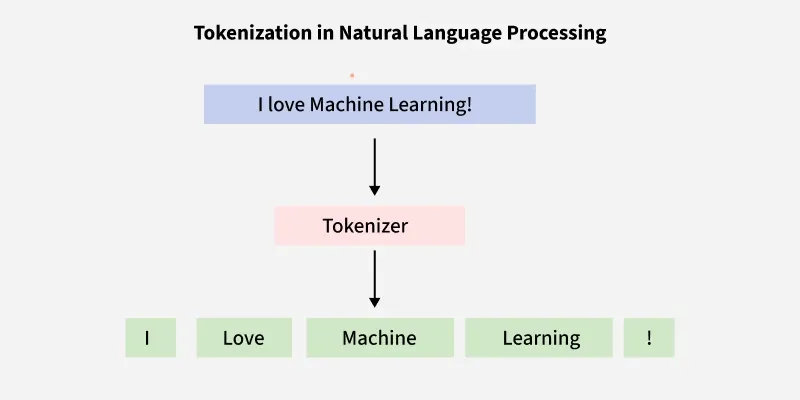

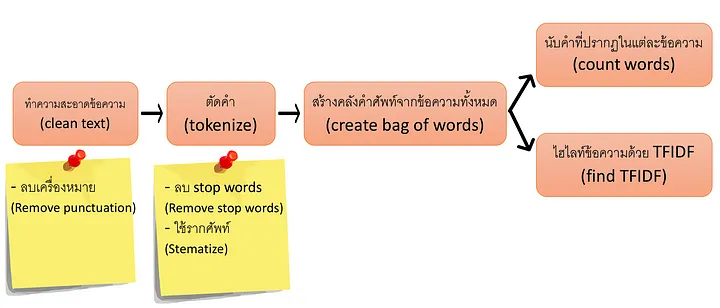

* Word Cleanup
    * สระเอสองตัว `เเ-` แก้เป็นสระแอ `แ-`
    * ซ้ำตัวสะกด `ด่วนนนนน` → `ด่วน`

In [68]:
#pip install pythainlp

In [69]:
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords
import string
import re

stopwords = set(thai_stopwords()) - {"ไม่"}

def clean_text(text):
    text = re.sub("เเ", "แ", text)                           # 🛠️ Fix miswritten vowel เเ → แ
    text = re.sub(r'(.)\1{2,}', r'\1', text)                # 🔁 Remove character repetition (e.g. มากกกก → มาก)
    text = re.sub(r'[^\u0E00-\u0E7Fa-zA-Z0-9\s]', '', text) # 🚫 Remove emojis and non-Thai characters (except spaces and numbers)
    return text

def preprocess(text):
    if not isinstance(text, str):
        text = ""
    text = clean_text(text)
    tokens = word_tokenize(text, keep_whitespace=False)
    tokens = [t for t in tokens if t not in stopwords and t not in string.punctuation]
    return tokens

data["tokens"] = data["remark"].apply(preprocess)


In [70]:
print(data["tokens"])

0        [แม่บ้าน, คืน, งาน, smart, world, แจ้ง, ไม่, ส...
1        [ลุก, ค้า, แจ้ง, เรื่อง, เข้ามา, แม่บ้าน, โทร,...
2        [ลูกค้า, แจ้ง, แม่บ้าน, ปิดประตู, มุ้งลวด, แรง...
3        [แม่บ้าน, กด, หัวใจ, ลูกค้า, งาน, ระบบ, อัตโนม...
4        [5126, Punika, Jantanop, ลูกค้า, แจ้ง, เข้ามา,...
                               ...                        
27588                     [แม่บ้าน, ไม่, สะดวก, ให้บริการ]
27589    [แม่บ้าน, ไม่, จัดเก็บ, สิ่งของ, ลูกค้า, ไม่, ...
27590    [2, ดาว, Complain, about, the, room, not, orga...
27591    [ลูกค้า, แจ้ง, รูปภาพ, พื้นที่, ไม่, สะอาด, เข...
27592    [แม่บ้าน, คน, ไม่, สะอาด, ต่อไป, ไม่, คน, นะคะ...
Name: tokens, Length: 27593, dtype: object


### <b>Step 2: Define Keywords for Each Category</b>
* Create a dictionary with `{"category_name": ["keyword1", "keyword2", ...]}`

In [71]:
# Take a look at each problem group input by service provider
data["problem_name"].unique()

array(['คืนงาน (กะทันหัน)', 'อื่น ๆ', 'ทำทรัพย์สินของลูกค้าเสียหาย',
       'ทำความสะอาดไม่เรียบร้อย', 'คุณภาพการให้บริการต่ำกว่า 4 ดาว',
       'คืนงาน (ล่วงหน้า)', 'ลูกค้าขอเงินคืน', 'เข้าให้บริการสาย',
       'Checkout ก่อนเวลา / ให้บริการไม่ครบชั่วโมงการจอง',
       'อุปกรณ์/น้ำยาทำความสะอาด', 'ขอเลื่อนเวลานัดหมายการให้บริการ', nan,
       'คืนงาน (โควิด)', 'แนวโน้มรับงานนอก / รับเงินสด',
       'ไม่โทร confirm หลังจากรับงาน หรือ ก่อนวันเข้าให้บริการ',
       'ทรัพย์สิน "สูญหาย" หลังใช้บริการ',
       'รับงานแล้วไม่ไปให้บริการ / ไม่มีการแจ้งเรื่องเข้ามา (No Show)',
       'ประกันคุณภาพ / ความพึงพอใจ', 'รีดผ้าไม่เรียบ',
       'แสดงกริยา ท่าทาง ไม่เหมาะสมขณะเข้าให้บริการ',
       'การสื่อสาร / ใช้ถ้อยคำไม่สุภาพ / สอบถามเรื่องส่วนตัวคุณลูกค้า',
       'ทิ้งของโดยไม่ถามคุณลูกค้า', 'Checkin ก่อนถึงสถานที่นัดหมาย',
       'ไม่แสดงตนเป็นผู้ให้บริการในระบบบีนีท', 'รีดผ้าไม่ครบจำนวนชิ้น',
       'ใช้โทรศัพท์ขณะให้บริการ',
       'เปิด/ปิด เครื่องใช้ไฟฟ้าของคุณลูกค้าโดยไม่ได้รับอนุญาต',
   

* Use <b>the words from df["tokens"] to help you build the keyword list</b>, but you need to manually decide which words represent which category.
* Use <b>Text Filters in Excel</b> to find keywords from each problem (Optional)

In [72]:
from collections import Counter

# Filter the DataFrame
tokens_series = data[data["problem_name"] == 'คืนงาน (กะทันหัน)']["tokens"]

# Flatten the list of tokens
all_tokens = [token for tokens in tokens_series for token in tokens]

# Count most common words
word_counts = Counter(all_tokens)
print(word_counts.most_common())

[('แม่บ้าน', 12938), ('\n', 12158), ('ไม่', 9503), ('งาน', 9098), ('แจ้ง', 9014), ('คืน', 6405), ('ลูกค้า', 4597), ('สะดวก', 3073), ('ให้บริการ', 2316), ('ประสาน', 2076), ('จอง', 1722), ('กด', 1622), ('ติดต่อ', 1436), ('รับงาน', 1287), ('เลื่อน', 1252), ('วันที่', 1209), ('เวลา', 1185), ('แอดมิน', 1135), ('น', 1016), ('นัดหมาย', 919), ('รหัส', 916), ('ท่าน', 914), ('Wean', 893), ('โทร', 869), ('เข้ามา', 854), ('เดินทาง', 854), ('รายละเอียด', 809), ('พิจารณา', 784), ('หมายเหตุ', 697), ('2', 678), ('ประสานงาน', 674), ('ประกัน', 668), ('ติดตาม', 666), ('คุณภาพ', 663), ('รถ', 661), ('2024', 652), ('อนุโลม', 650), ('นะคะ', 634), ('ดู', 631), ('ยกเลิก', 563), ('รับทราบ', 538), ('ต้องการ', 531), ('เคส', 523), ('หา', 520), ('Moo', 504), ('แชท', 453), ('บริการ', 452), ('บาท', 451), ('2023', 439), ('การคืน', 427), ('ค่าธรรมเนียม', 421), ('บ้าน', 416), ('ทำ', 409), ('พี่', 408), ('หมอ', 407), ('ด่วน', 399), ('ลูก', 390), ('1000', 385), ('เบื้องต้น', 377), ('ชม', 371), ('ลุก', 360), ('อาการ', 345)

In [73]:
# First Keywords Idea
'''keyword_dict = {
    "คืนงาน (กะทันหัน)": ["คืน", "งาน", "สะดวก", "กด", "ยกเลิก", "ตอนนี้"],
    #"อื่น ๆ": ["หมายเหตุ", "รายละเอียด", "ประสาน", "เรื่อง", "สอบถาม", "ประสานงาน", "ต้องการ"],
    "ทำทรัพย์สินของลูกค้าเสียหาย": ["ทำ", "แตก", "ประกัน", "เคลม", "เสียหาย",
                               "หัก", "กระจก", "หลุด", "รอย", "แก้ว", "ตก",
                               "หล่น", "ความเสียหาย", "พัง", "ขวด"],
    "ทำความสะอาดไม่เรียบร้อย": ["ทำความสะอาด", "เรียบร้อย", "สะอาด", "ฝุ่น", "เช็ด",
                             "คุณภาพ", "คราบ", "ยังมี", "จุด", "ล้าง", "ถู"],
    "คุณภาพการให้บริการต่ำกว่า 4 ดาว": ["ดาว", "รีวิว", "3", "2", "Comment",
                                   "1", "ปรับปรุง", "ดี"],
    "คืนงาน (ล่วงหน้า)": ["ประสาน", "นัดหมาย", "2024", "2023", "2025", "เลื่อน"
                       "ศุกร์", "เสาร์", "จันทร์", "ธ.ค.", "(13:00)", "พ.ค.",
                       "เม.ย.", "ส.ค.", "อังคาร", "ก.พ.", "ต.ค.", "ม.ค.",
                       "(08:00)", "มิ.ย.", "(11:00)"],
    "ลูกค้าขอเงินคืน": ["เงิน"],
    "เข้าให้บริการสาย": ["สาย", "รอ"],
    "Checkout ก่อนเวลา / ให้บริการไม่ครบชั่วโมงการจอง": ["ก่อนเวลา", "ออกจาก"],
    "อุปกรณ์/น้ำยาทำความสะอาด": ["อุปกรณ์", "น้ำยา", "เครื่องดูดฝุ่น"],
    "ขอเลื่อนเวลานัดหมายการให้บริการ": ["เลื่อน", "ให้บริการ", "เลื่อนเวลา", "นัดหมาย", "เดิม"],
    "คืนงาน (โควิด)": ["โควิด", "ติด", "กักตัว", "้เสี่ยง", "กัก", "โค", "เชื้อ", "เจ็บ", "คอ"],
    "แนวโน้มรับงานนอก / รับเงินสด": ["ชั่วโมง", "บาท", "เวลา", "พฤติกรรม", 
                                 "behavior", "cash", "charging"],
    "ไม่โทร confirm หลังจากรับงาน หรือ ก่อนวันเข้าให้บริการ": ["โทร", "คอนเฟิร์ม"],
    'ทรัพย์สิน "สูญหาย" หลังใช้บริการ': ["หาย", "วาง", "เจอ", "หา", "สูญหาย",
                                   "ขโมย", "ทิ้ง", "ทรัพย์สิน", "หาไม่", "missing", "lost"],
    "รับงานแล้วไม่ไปให้บริการ / ไม่มีการแจ้งเรื่องเข้ามา (No Show)": ["ติดต่อ", "ให้บริการ", "รับสาย", "เข้างาน", "รับงาน"],
    "ประกันคุณภาพ / ความพึงพอใจ": ["เรียบร้อย", "ต้องการ", "ติดต่อ", "เรียบร้อย", "ปัญหา", "รู้สึก", "พอใจ"],
    "รีดผ้าไม่เรียบ": ["ironing", "รีด", "รีดผ้า", "เสื้อผ้า", "เสื้อ", "ผ้า"],
    "แสดงกริยา ท่าทาง ไม่เหมาะสมขณะเข้าให้บริการ": ["มารยาท", "พฤติกรรม", "ปัญหา", "เถียง", "แย่มาก", 
                                              "พูดจา", "ฟัง", "การทำงาน", "บ่น", "มีปัญหา"],
    "การสื่อสาร / ใช้ถ้อยคำไม่สุภาพ / สอบถามเรื่องส่วนตัวคุณลูกค้า": ["ส่วนตัว", "บ่น", "วางสาย", "โทร", "ติดต่อ", "มารยาท",
                                                          "รู้สึก", "คุย", "พอใจ", "พฤติกรรม", "รบกวน"],
    "ทิ้งของโดยไม่ถามคุณลูกค้า": ["ขยะ", "ถุง", "หาย", "บางอย่าง", "เจอ", 
                             "วาง", "ถังขยะ", "ลืม", "เผลอ", "สูญหาย"],
    "Checkin ก่อนถึงสถานที่นัดหมาย": ["เข้ามา", "รอ", "หน้า", "เช็ค", "อิน", "ก่อนเวลา", "มาถึง"],
    "ไม่แสดงตนเป็นผู้ให้บริการในระบบบีนีท": ["ระบบ", "ID", "รหัส", "ชื่อ", "แชท", "ข้อมูล"],
    "รีดผ้าไม่ครบจำนวนชิ้น": ["รีด", "ชิ้น", "รีดผ้า", "ตัว", "ผ้า", "จำนวน"],
    "ใช้โทรศัพท์ขณะให้บริการ": ["โทรศัพท์", "เล่น", "ให้บริการ", "ทำงาน", "คุย", "ทำ", "ตอน", "เกมส์", "ดู"],
    "เปิด/ปิด เครื่องใช้ไฟฟ้าของคุณลูกค้าโดยไม่ได้รับอนุญาต": ["แอร์", "ลืม", "ไฟ", "ปิดไฟ", "ปลั๊ก", "เสียบ",
                                                    "ได้รับอนุญาต", "สับ", "คัต", "เอาท์", "ค้าง"],
    "แต่งกายไม่เรียบร้อย / ไม่ถูกกาละเทศะ": ["ชุด", "ดูไม่ได้", "แต่งกาย", "สุภาพ", "เหมาะสม",
                                       "ภาพลักษณ์", "กางเกงขาสั้น"],
    "พาบุคคลภายนอก (นอกเหนือจากข้อมูลการจอง) เข้าให้บริการ": ["คน", "แฟน", "ลูก", "แมว", "ลูกสาว", 
                                                        "คนแปลกหน้า", "คนนอก", "คนอื่น", "เด็ก"],
    "แอร์ไม่เย็น ": ["แอร์", "เย็น", "ปัญหา", "ช่าง", "ลม", "เป็นปกติ", "เช็ค", "ล้าง"],
    "แอร์มีน้ำหยด": ["แอร์", "น้ำ", "หยด", "ช่าง", "ล้าง", "ไหล", "รั่ว", "ผนัง", "ลงมา"],
    "แอร์มีเสียงดัง ": ["แอร์", "เสียง", "มีเสียง", "รบกวน", "พักลม"],
    'พื้นที่ "ล้างแอร์" ยังไม่สะอาดเรียบร้อย': ["แอร์", "น้ำ", "พื้น", "เปียก", "สะอาด",
                                      "เลอะ", "ทำความสะอาด", "กระเด็น"],
    "แอร์เสีย หลังการล้าง": ["แอร์", "สวิง", "ติด", "เบอร์", "หยุด"],
    "ไม่สามารถให้บริการได้ครบตามการจอง [เกิดปัญหาจากคุณลูกค้า]": ["แอร์", "เครื่อง", "แกะ", "มีปัญหา",
                                                          "แขวน", "แผ่นดินไหว", "ด้านล่าง", 
                                                          "พบเห็น", "กลิ่น", "ฉีด"],
    "ผู้ให้บริการไปถึงแล้ว แต่ไม่สามารถเข้าให้บริการได้ [เกิดปัญหาจากคุณลูกค้า]": ["หน้า", "สะดวก", "ทำ", "ยกเลิก", "ว่าไม่ได้"],
    "รีดผ้าไหม้ / ผ้าเสียหาย": ["ไหม้", "รีดผ้า", "รีด", "เสียหาย", "ผ้า", "ย่น", "เนื้อผ้า", "ไฟ"],
    "คืนงาน (โครงการป้อนงานคุณแม่บ้าน)": ["คืน", "สะดวก", "งาน", "การคืน", "โครงการ"],
    "แอร์เปิดไม่ติด ": ["แอร์", "ทำงาน", "ปกติ", "ช่าง", "ซ่อม"]
}'''

'keyword_dict = {\n    "คืนงาน (กะทันหัน)": ["คืน", "งาน", "สะดวก", "กด", "ยกเลิก", "ตอนนี้"],\n    #"อื่น ๆ": ["หมายเหตุ", "รายละเอียด", "ประสาน", "เรื่อง", "สอบถาม", "ประสานงาน", "ต้องการ"],\n    "ทำทรัพย์สินของลูกค้าเสียหาย": ["ทำ", "แตก", "ประกัน", "เคลม", "เสียหาย",\n                               "หัก", "กระจก", "หลุด", "รอย", "แก้ว", "ตก",\n                               "หล่น", "ความเสียหาย", "พัง", "ขวด"],\n    "ทำความสะอาดไม่เรียบร้อย": ["ทำความสะอาด", "เรียบร้อย", "สะอาด", "ฝุ่น", "เช็ด",\n                             "คุณภาพ", "คราบ", "ยังมี", "จุด", "ล้าง", "ถู"],\n    "คุณภาพการให้บริการต่ำกว่า 4 ดาว": ["ดาว", "รีวิว", "3", "2", "Comment",\n                                   "1", "ปรับปรุง", "ดี"],\n    "คืนงาน (ล่วงหน้า)": ["ประสาน", "นัดหมาย", "2024", "2023", "2025", "เลื่อน"\n                       "ศุกร์", "เสาร์", "จันทร์", "ธ.ค.", "(13:00)", "พ.ค.",\n                       "เม.ย.", "ส.ค.", "อังคาร", "ก.พ.", "ต.ค.", "ม.ค.",\n                       "(08:00)", "มิ.ย.",

In [74]:
# Refined Keywords
keyword_dict = {
    "คืนงาน (กะทันหัน)": [
        "คืน", "แจ้ง", "สะดวก", "กด", "ยกเลิก", "ไม่สะดวก", "ตอนนี้", "ติดธุระ", 
        "ขอยกเลิก", "ไม่สามารถ", "ขอเลื่อน", "ไม่ว่าง", "กะทันหัน", "ป่วย", "รับงาน", 
        "ไม่ไป", "ติด", "ติดภารกิจ", "ไม่พร้อม", "มีธุระ", "ไม่สะดวกให้บริการ", "ติดงาน",
        "ติดต่อ", "ไม่สามารถให้บริการ", "แม่บ้านไม่ว่าง", "เลื่อน", "วันนี้", "ภารกิจ"
    ],
    "คืนงาน (ล่วงหน้า)": [
        "ประสาน", "นัดหมาย", "เลื่อน", "แจ้งล่วงหน้า", "ขอเลื่อน", "เปลี่ยนเวลา", "ไม่สะดวก",
        "ขอเปลี่ยน", "ไม่ว่าง", "ขอเลื่อนเวลา", "ไม่สามารถ", "ต้องเลื่อน", "เลื่อนเวลา", 
        "ยกเลิกนัด", "เปลี่ยนวัน", "นัดใหม่", "วันอื่น", "ขอแจ้ง", "ยกเลิก", "เปลี่ยน", "เลื่อนนัด",
        # Optional: date/time tokens (low weight, but may help)
        "ศุกร์", "เสาร์", "จันทร์", "อังคาร", "พุธ", "พฤหัส", "อาทิตย์",
        "ม.ค.", "ก.พ.", "มี.ค.", "เม.ย.", "พ.ค.", "มิ.ย.", "ก.ค.", "ส.ค.", "ก.ย.", "ต.ค.", "พ.ย.", "ธ.ค.",
        "2023", "2024", "2025",
        "(08:00)", "(11:00)", "(13:00)"
    ],
    "คุณภาพการให้บริการต่ำกว่า 4 ดาว": [
        "ดาว", "รีวิว", "1", "2", "3", "1ดาว", "2ดาว", "3ดาว",
        "ไม่ประทับใจ", "ไม่โอเค", "ไม่พอใจ", "ไม่ดี", "ต้องปรับปรุง", "ควรปรับปรุง",
        "ขอติ", "ข้อติ", "มีข้อเสีย", "พัฒนาด่วน", "ควรพัฒนา", "ต่ำกว่ามาตรฐาน", 
        "บริการไม่ดี", "ความสะอาดไม่ดี", "comment", "feedback", "แย่", "ไม่เรียบร้อย",
        "ไม่ครบ", "พลาด", "ลืม", "ตกหล่น", "รีวิวไม่ดี"
    ],
    "ทำความสะอาดไม่เรียบร้อย": [
        "ทำความสะอาด", "ไม่สะอาด", "ไม่เรียบร้อย", "ฝุ่น", "คราบ", "ล้างไม่สะอาด",
        "เช็ด", "จุด", "ยังมี", "เหลือ", "พลาด", "เลอะ", "ไม่ครบ", "ถู", "ล้าง", "ไม่เก็บ",
        "พื้นสกปรก", "ผนัง", "คราบน้ำ", "พื้นเปียก", "ลืมเช็ด", "ลืมเก็บ", "คุณภาพแย่",
        "ความสะอาด", "ต้องทำซ้ำ", "พื้นไม่สะอาด", "เก็บงานไม่ดี", "เก็บไม่หมด"
    ],
    "ทำทรัพย์สินของลูกค้าเสียหาย": [
        "ทำเสีย", "ทำตก", "ทำแตก", "ทำพัง", "ทำหล่น", "ทำร่วง", "ร่วง", "แตก", "พัง", "ร้าว", "รอย", 
        "บุบ", "หล่น", "ร่วง", "เสียหาย", "ความเสียหาย", "ทรัพย์สิน", "ข้าวของ", "ของใช้", 
        "ขวด", "แก้ว", "กระจก", "โต๊ะ", "เก้าอี้", "พื้น", "ประตู", "ฝา", "หลอด", 
        "หัก", "หลุด", "เคลม", "ประกัน", "ขอเคลม", "ชดใช้", "เสีย", "ขูด", "ครูด"
    ],
    "ลูกค้าขอเงินคืน": [
        "เงินคืน", "ขอเงินคืน", "คืนเงิน", "ขอคืนเงิน", "เงิน", "คืน", "คืนเงินสด",
        "ขอคืน", "คืนยอด", "คืนค่าบริการ", "คืนค่าจอง", "ขอเงิน", "คืนยอดเงิน",
        "เงินคืนให้", "คืนเงินลูกค้า", "เงินสด", "ขอคืนยอด", "คืนค่ามัดจำ"
    ],
    
    
    "คืนงาน (โควิด)": [
        "โควิด", "โควิด19", "covid", "covid19", "ติดโควิด", "ติดเชื้อ", "ติดไวรัส",
        "กักตัว", "กักบริเวณ", "เสี่ยงสูง", "เสี่ยง", "เจ็บคอ", "ไข้อ่อน", "ไม่สบาย",
        "ไข้", "ไอ", "เหนื่อย", "ไม่สบาย", "ป่วย", "ตรวจโควิด", "ผลตรวจ", "ตรวจเชื้อ",
        "กักตัว14วัน", "กักตัว 14 วัน", "แยกตัว", "ล้มป่วย", "พักรักษา"
    ],
    "Checkout ก่อนเวลา / ให้บริการไม่ครบชั่วโมงการจอง": [
        "ก่อนเวลา", "ออกก่อน", "ออกจาก", "ออกก่อนเวลา", "ก่อนกำหนด", "ไม่ครบชั่วโมง",
        "ให้บริการไม่ครบ", "เลิกงานก่อน", "เลิกก่อน", "ออกก่อนกำหนด", "จบก่อน",
        "บริการไม่ครบ", "รีบออก", "เลิกเร็ว", "หยุดก่อน", "เลิกให้บริการก่อน"
    ],
    "เข้าให้บริการสาย": [
        "สาย", "มาสาย", "เข้าช้า", "ช้า", "ถึงช้า", "รอ", "รอนาน", "มาช้า",
        "รอเกิน", "เกินเวลา", "เกินนัด", "รอเป็นชั่วโมง", "เลท", "ไม่ตรงเวลา",
        "มาช้ากว่ากำหนด", "มาเกินเวลา", "ดีเลย์", "ล่าช้า", "ล่าช้ากว่ากำหนด"
    ],
    "รับงานแล้วไม่ไปให้บริการ / ไม่มีการแจ้งเรื่องเข้ามา (No Show)": [
        "ไม่มา", "ไม่ไป", "ไม่ให้บริการ", "หาย", "เงียบ", "ไม่ติดต่อ", "ติดต่อไม่ได้", 
        "ไม่รับสาย", "ไม่แจ้ง", "ไม่เข้างาน", "ไม่เข้าหน้างาน", "ขาดงาน", 
        "หายไป", "ไม่มีการแจ้ง", "ไม่ตอบ", "ไม่ปรากฏตัว", "ไม่โผล่", 
        "รับงานแต่ไม่มา", "รับงานแล้วไม่เข้า", "ไม่มาตามนัด", "no show"
    ],
    'ทรัพย์สิน "สูญหาย" หลังใช้บริการ': [
        "หาย", "สูญหาย", "ของหาย", "ทรัพย์สิน", "หาไม่เจอ", "หาไม่พบ", "ขาดหาย", "หายไป", 
        "ของไม่มี", "ไม่มีของ", "เจอไม่ครบ", "ของหายไป", "ขโมย", "ของขโมย", "ทิ้ง",
        "ไม่เจอ", "หาไม่", "ไม่พบ", "หายหลังใช้บริการ", 
        "วางไว้", "วางหาย", "ลืมไว้", "ของหายหลัง", 
        "missing", "lost", "stolen"
    ],
    "ประกันคุณภาพ / ความพึงพอใจ": [
        "ไม่พอใจ", "ไม่ประทับใจ", "รู้สึกไม่ดี", "ไม่โอเค", "คุณภาพ", "ปัญหา", 
        "ความพึงพอใจ", "ความไม่พึงพอใจ", "ต้องการ", "ต้องการติดต่อ", "ติดต่อกลับ", 
        "อยากให้", "ขอแจ้ง", "ประสานงาน", "ขอคำชี้แจง", "อยากสอบถาม", "สอบถามเพิ่มเติม", 
        "ติดต่อ", "พูดคุย", "แจ้งปัญหา", "อยากให้ปรับปรุง", "รู้สึก", "ข้อเสนอแนะ", 
        "ข้อคิดเห็น", "ติดต่อเรื่องประกัน", "ประกัน", "สอบถามประกัน"
    ],
    "คืนงาน (โครงการป้อนงานคุณแม่บ้าน)": [
        "คืน", "ขอคืน", "คืนงาน", "สะดวก", "ไม่สะดวก", "ยกเลิก", "การคืน", "คืนคิว", "ไม่สามารถ",
        "โครงการ", "โครงการป้อนงาน", "ป้อนงาน", "ระบบป้อนงาน", "ระบบใหม่", 
        "งานจากระบบ", "แม่บ้านไม่สะดวก", "คืนงานโครงการ", "ยกเลิกงาน", "ไม่อยากรับงาน", "ไม่พร้อมทำงาน"
    ],
    "ขอเลื่อนเวลานัดหมายการให้บริการ": [
        "ขอเลื่อน", "เลื่อนเวลา", "เลื่อนนัด", "เปลี่ยนเวลา", "เปลี่ยนวัน", "เลื่อน", "เปลี่ยนนัด",
        "ขอเปลี่ยน", "นัดหมายใหม่", "นัดใหม่", "เลื่อนออกไป", "เลื่อนวัน", "วันอื่น", "เวลาอื่น", 
        "นัดหมาย", "ขอเปลี่ยนเวลา", "เปลี่ยนตาราง", "แจ้งเลื่อน", "เปลี่ยนคิว", "เปลี่ยนรอบ", "ไม่สะดวกเวลาเดิม"
    ],
    "อุปกรณ์/น้ำยาทำความสะอาด": [
        "อุปกรณ์", "ไม่มีอุปกรณ์", "ลืมอุปกรณ์", "อุปกรณ์ไม่ครบ", "อุปกรณ์ไม่เพียงพอ", "อุปกรณ์ชำรุด",
        "น้ำยา", "ไม่มีน้ำยา", "น้ำยาหมด", "ลืมน้ำยา", "คุณภาพน้ำยา", "น้ำยาไม่ดี", 
        "เครื่องดูดฝุ่น", "ลืมเครื่องดูดฝุ่น", "เครื่องไม่ทำงาน", "เครื่องพัง", "ไม่เอาอุปกรณ์มา", 
        "ไม่ได้เตรียม", "ไม่เตรียมอุปกรณ์", "เครื่องมือ", "แปรง", "ไม้ถู", "ไม้กวาด", "ผ้าเช็ด"
    ],
    "แสดงกริยา ท่าทาง ไม่เหมาะสมขณะเข้าให้บริการ": [
        "มารยาท", "ไม่มีมารยาท", "พฤติกรรม", "พฤติกรรมไม่เหมาะสม", "พูดจาไม่ดี", "พูดจาไม่สุภาพ", 
        "พูดไม่ดี", "พูดไม่เพราะ", "เถียง", "เถียงลูกค้า", "แย่มาก", "กิริยา", "กิริยาไม่เหมาะสม",
        "แสดงกริยา", "ท่าทาง", "ทำหน้าบึ้ง", "บ่น", "บ่นลูกค้า", "ทำกิริยา", 
        "หงุดหงิด", "ไม่พอใจ", "ทำเสียง", "เสียงดัง", "ไม่ยิ้ม", "พูดเสียงแข็ง", 
        "การทำงาน", "ไม่ตั้งใจทำงาน", "ไม่แคร์", "พูดจา", "ฟัง", "ไม่สนใจ", "มีปัญหา"
    ],
    "แนวโน้มรับงานนอก / รับเงินสด": [
        "รับเงินสด", "ขอรับเงินสด", "โอนเงิน", "ขอโอน", "จ่ายเงินสด", "เก็บเงินสด", "ชำระเงินสด",
        "cash", "จ่ายตรง", "จ่ายหน้างาน", "จ่ายกับแม่บ้าน", "จ่ายให้โดยตรง", "ไม่ผ่านระบบ",
        "จ้างนอกระบบ", "นอกระบบ", "รับงานนอก", "ตกลงกันเอง", "ติดต่อส่วนตัว", "ขอเบอร์ติดต่อ",
        "เบอร์โทร", "LINE", "นัดนอกระบบ", "เบอร์ส่วนตัว", "โอนตรง", "ไม่ผ่านแอป", 
        "charging", "คิดราคาเอง", "ขอคิดเงิน", "คิดเงินเพิ่ม", "ราคาพิเศษ", "ราคานอกระบบ"
    ],
    "การสื่อสาร / ใช้ถ้อยคำไม่สุภาพ / สอบถามเรื่องส่วนตัวคุณลูกค้า": [
        "พูดไม่สุภาพ", "พูดจาไม่ดี", "คำพูดไม่เหมาะสม", "คำพูดแย่", "ใช้ถ้อยคำไม่เหมาะสม", 
        "พูดจาแรง", "พูดเสียงแข็ง", "ใช้คำไม่ดี", "คำไม่สุภาพ", "มารยาทในการพูด",
        "ถามเรื่องส่วนตัว", "ถามเรื่องส่วนตัวเกินไป", "ซักถาม", "ถามเยอะ", 
        "รบกวน", "รู้สึกรำคาญ", "รู้สึกอึดอัด", "คุยมากเกิน", "คุยนอกเรื่อง", 
        "โทร", "โทรบ่อย", "วางสาย", "ไม่สุภาพ", "ติดต่อไม่เหมาะสม", "สื่อสารไม่ดี", 
        "พูดมาก", "พูดจา", "พูดแทรก", "พฤติกรรม", "คุยเล่น", "ไม่พอใจ", "บ่น"
    ],
    "ไม่โทร confirm หลังจากรับงาน หรือ ก่อนวันเข้าให้บริการ": [
        "ไม่โทร", "ไม่คอนเฟิร์ม", "ไม่ยืนยัน", "ไม่แจ้ง", "ไม่ติดต่อ", "ไม่ตอบรับ", 
        "ไม่ได้โทร", "ไม่ได้คอนเฟิร์ม", "ไม่โทรคอนเฟิร์ม", "ไม่ได้ยืนยัน", 
        "โทร", "คอนเฟิร์ม", "ยืนยัน", "แจ้ง", "ติดต่อ"
    ],
    "ทิ้งของโดยไม่ถามคุณลูกค้า": [
        "ทิ้ง", "ทิ้งของ", "ทิ้งของโดยไม่ถาม", "ทิ้งขยะ", "ขยะ", "ถุง", "ถังขยะ", 
        "ลืมถาม", "ไม่ถาม", "เผลอ", "วางไว้", "วางผิดที่", "วางของผิดที่", 
        "หาย", "สูญหาย", "บางอย่าง", "ของหาย", "เจอของ", "เก็บไม่หมด", "เก็บไม่ครบ", 
        "ลืม", "ทิ้งผิด", "เผลอทิ้ง"
    ],
    "Checkin ก่อนถึงสถานที่นัดหมาย": [
        "เช็คอินก่อน", "เช็คอิน", "เข้ามา", "ก่อนเวลา", "มาถึงก่อน", "รอ", "รอนาน",
        "หน้า", "มาก่อน", "มาก่อนเวลา", "เข้าไปก่อน", "เข้าหน้างานก่อน", "เช็ค", "อิน",
        "เตรียมงานก่อน", "ถึงก่อนเวลา"
    ],
    "รีดผ้าไม่เรียบ": [
        "รีดไม่เรียบ", "รีดผ้าไม่เรียบ", "รีดไม่ดี", "รีดไม่เรียบร้อย", "ผ้ายับ", "ยับ",
        "รีดผ้า", "รีด", "เสื้อผ้ายับ", "เสื้อผ้าไม่เรียบ", "เสื้อยับ", "ผ้าย่น", "ยับมาก",
        "รีดเสื้อ", "รีดไม่เนี๊ยบ", "รีดผิด", "รีดผ้าไม่เรียบร้อย"
    ],
    "เปิด/ปิด เครื่องใช้ไฟฟ้าของคุณลูกค้าโดยไม่ได้รับอนุญาต": [
        "เปิด", "ปิด", "เปิดแอร์", "ปิดแอร์", "แอร์", "ปิดไฟ", "เปิดไฟ", "ไฟ",
        "ปลั๊ก", "เสียบปลั๊ก", "ถอดปลั๊ก", "สับปลั๊ก", "สับ", "คัต", "คัท", "ตัดไฟ",
        "ค้าง", "เครื่องใช้ไฟฟ้า", "ไม่ได้รับอนุญาต", "ไม่ได้ขออนุญาต", "ไม่ได้ขอ",
        "ลืมปิด", "ลืมเปิด", "ปิดผิด", "เปิดผิด", "เปิดโดยไม่ได้รับอนุญาต", "ปิดโดยไม่ได้รับอนุญาต"
    ],

    "ไม่แสดงตนเป็นผู้ให้บริการในระบบบีนีท": [
        "ระบบ", "ID", "รหัส", "ชื่อ", "แชท", "ข้อมูล", "ไม่แสดงตน", "ไม่ยืนยันตัวตน", 
        "ไม่มีชื่อ", "ไม่มีรหัส", "ไม่ใส่ข้อมูล"
    ],
    "รีดผ้าไม่ครบจำนวนชิ้น": [
        "รีด", "ชิ้น", "รีดผ้า", "ตัว", "ผ้า", "จำนวน", "ไม่ครบ", "ขาด", 
        "เหลือไม่ครบ", "น้อยกว่า"
    ],
    "รีดผ้าไหม้ / ผ้าเสียหาย": [
        "ไหม้", "รีดผ้า", "รีด", "เสียหาย", "ผ้า", "ย่น", "เนื้อผ้า", "ไฟ", 
        "รอยไหม้", "ผ้าขาด", "ผ้าเสีย"
    ],
    "ใช้โทรศัพท์ขณะให้บริการ": [
        "โทรศัพท์", "เล่น", "ให้บริการ", "ทำงาน", "คุย", "ทำ", "ตอน", "เกมส์", 
        "ดู", "มือถือ", "เล่นมือถือ", "ส่งข้อความ"
    ],
    "แต่งกายไม่เรียบร้อย / ไม่ถูกกาละเทศะ": [
        "ชุด", "ดูไม่ได้", "แต่งกาย", "สุภาพ", "เหมาะสม", "ภาพลักษณ์", "กางเกงขาสั้น", 
        "แต่งตัวไม่เหมาะสม", "ไม่สุภาพ", "แต่งตัวไม่เรียบร้อย"
    ],
    "พาบุคคลภายนอก (นอกเหนือจากข้อมูลการจอง) เข้าให้บริการ": [
        "คน", "แฟน", "ลูก", "แมว", "ลูกสาว", "คนแปลกหน้า", "คนนอก", "คนอื่น", "เด็ก", 
        "พาคนมา", "พาคนแปลกหน้า"
    ],
    "แอร์ไม่เย็น": [
        "แอร์", "เย็น", "ปัญหา", "ช่าง", "ลม", "เป็นปกติ", "เช็ค", "ล้าง", 
        "ไม่เย็น", "แอร์ไม่ทำงาน", "แอร์เสีย"
    ],
    "แอร์มีน้ำหยด": [
        "แอร์", "น้ำ", "หยด", "ช่าง", "ล้าง", "ไหล", "รั่ว", "ผนัง", "ลงมา", 
        "น้ำหยด", "น้ำรั่ว"
    ],
    "แอร์มีเสียงดัง": [
        "แอร์", "เสียง", "มีเสียง", "รบกวน", "พักลม", "เสียงดัง", "เสียงแอร์", "เสียงรบกวน"
    ],
    "พื้นที่ \"ล้างแอร์\" ยังไม่สะอาดเรียบร้อย": [
        "แอร์", "น้ำ", "พื้น", "เปียก", "สะอาด", "เลอะ", "ทำความสะอาด", "กระเด็น", 
        "ไม่สะอาด", "คราบสกปรก"
    ],
    "แอร์เสีย หลังการล้าง": [
        "แอร์", "สวิง", "ติด", "เบอร์", "หยุด", "แอร์เสีย", "เสียหลังล้าง", "แอร์ไม่ทำงานหลังล้าง"
    ],
    "แอร์เปิดไม่ติด": [
        "แอร์", "ทำงาน", "ปกติ", "ช่าง", "ซ่อม", "เปิดไม่ติด", "แอร์ไม่ติด", "แอร์เปิดไม่ทำงาน"
    ],
    "ไม่สามารถให้บริการได้ครบตามการจอง [เกิดปัญหาจากคุณลูกค้า]": [
        "แอร์", "เครื่อง", "แกะ", "มีปัญหา", "แขวน", "แผ่นดินไหว", "ด้านล่าง", "พบเห็น", 
        "กลิ่น", "ฉีด", "ปัญหาลูกค้า", "ลูกค้าไม่พร้อม", "ลูกค้าไม่อนุญาต"
    ],
    "ผู้ให้บริการไปถึงแล้ว แต่ไม่สามารถเข้าให้บริการได้ [เกิดปัญหาจากคุณลูกค้า]": [
        "หน้า", "สะดวก", "ทำ", "ยกเลิก", "ว่าไม่ได้", "เข้าไม่ได้", "ลูกค้าไม่ให้เข้า", 
        "ไม่อนุญาตให้เข้า", "ลูกค้าไม่สะดวก"
    ]
}

### <b>Step 3: Categorize Based on Keyword Matching</b>
* Match tokens against the keyword list and assign a category

* <b>Score-based categorization</b> that counts how many keywords match per category and picks the category with the highest match count

In [76]:
def categorize_score(tokens, keyword_dict):
    scores = {}
    for category, keywords in keyword_dict.items():
        count = sum(token in keywords for token in tokens)
        if count > 0:
            scores[category] = count
    if scores:
        # Return category with highest score
        return max(scores, key=scores.get)
    return None

data["category"] = data["tokens"].apply(lambda tokens: categorize_score(tokens, keyword_dict))

In [77]:
data

,report_problem_id,professional_id,problem_group,problem_name,report_date,remark,tokens,category
0,7714,1753,คืนงาน / ไม่เข้าให้บริการ,คืนงาน (กะทันหัน),2022-01-01 00:00:00,คุณแม่บ้านคืนงาน smart world แจ้งไม่สะบายค่ะ \...,"[แม่บ้าน, คืน, งาน, smart, world, แจ้ง, ไม่, ส...",คืนงาน (กะทันหัน)
1,7715,5033,อื่น ๆ,อื่น ๆ,2022-01-01 00:00:00,คุณลุกค้าแจ้งเรื่องเข้ามาว่า คุณแม่บ้านได้โทรห...,"[ลุก, ค้า, แจ้ง, เรื่อง, เข้ามา, แม่บ้าน, โทร,...",ไม่โทร confirm หลังจากรับงาน หรือ ก่อนวันเข้าใ...
2,7716,2363,"ทรัพย์สิน ""เสียหาย""",ทำทรัพย์สินของลูกค้าเสียหาย,2022-01-01 00:00:00,คุณลูกค้าแจ้งว่า คุณแม่บ้านเปิดปิดประตูมุ้งลวด...,"[ลูกค้า, แจ้ง, แม่บ้าน, ปิดประตู, มุ้งลวด, แรง...",คืนงาน (กะทันหัน)
3,7717,4379,คืนงาน / ไม่เข้าให้บริการ,คืนงาน (กะทันหัน),2022-01-01 00:00:00,เนื่องจากคุณแม่บ้านกดหัวใจให้คุณลูกค้างานจึงเข...,"[แม่บ้าน, กด, หัวใจ, ลูกค้า, งาน, ระบบ, อัตโนม...",คืนงาน (กะทันหัน)
4,7718,5126,"ทรัพย์สิน ""เสียหาย""",ทำทรัพย์สินของลูกค้าเสียหาย,2022-01-01 00:00:00,5126 : Punika Jantanop คุณลูกค้าแจ้งเข้ามาว่...,"[5126, Punika, Jantanop, ลูกค้า, แจ้ง, เข้ามา,...",คืนงาน (กะทันหัน)
...,...,...,...,...,...,...,...,...
27588,36346,11979,คืนงาน / ไม่เข้าให้บริการ,คืนงาน (โครงการป้อนงานคุณแม่บ้าน),2025-05-31 19:16:00,คุณแม่บ้านไม่สะดวกเข้าให้บริการค่ะ,"[แม่บ้าน, ไม่, สะดวก, ให้บริการ]",คืนงาน (กะทันหัน)
27589,36347,7992,คุณภาพการให้บริการ,ทำความสะอาดไม่เรียบร้อย,2025-05-31 20:57:00,คุณแม่บ้านไม่ได้มีการจัดเก็บสิ่งของให้คุณลูกค้...,"[แม่บ้าน, ไม่, จัดเก็บ, สิ่งของ, ลูกค้า, ไม่, ...",ทำความสะอาดไม่เรียบร้อย
27590,36353,1112,คุณภาพการให้บริการ,คุณภาพการให้บริการต่ำกว่า 4 ดาว,2025-05-31 23:08:00,"2 ดาว Complain about the room, not organizin...","[2, ดาว, Complain, about, the, room, not, orga...",คุณภาพการให้บริการต่ำกว่า 4 ดาว
27591,36356,11973,คุณภาพการให้บริการ,ทำความสะอาดไม่เรียบร้อย,2025-05-31 19:00:00,คุณลูกค้าแจ้งรูปภาพพื้นที่ไม่สะอาดเข้ามาทางแชท,"[ลูกค้า, แจ้ง, รูปภาพ, พื้นที่, ไม่, สะอาด, เข...",คืนงาน (กะทันหัน)


In [48]:
data.to_csv("categorized_report_problem.csv", index=False, encoding="utf-8-sig")

In [78]:
data["category"].value_counts()

category
คืนงาน (กะทันหัน)                                                             14308
คุณภาพการให้บริการต่ำกว่า 4 ดาว                                                3517
ทำความสะอาดไม่เรียบร้อย                                                        2290
คืนงาน (ล่วงหน้า)                                                              2160
ทำทรัพย์สินของลูกค้าเสียหาย                                                    1180
ใช้โทรศัพท์ขณะให้บริการ                                                        1095
ประกันคุณภาพ / ความพึงพอใจ                                                      527
พื้นที่ "ล้างแอร์" ยังไม่สะอาดเรียบร้อย                                         477
ไม่โทร confirm หลังจากรับงาน หรือ ก่อนวันเข้าให้บริการ                          354
ทิ้งของโดยไม่ถามคุณลูกค้า                                                       182
Checkin ก่อนถึงสถานที่นัดหมาย                                                   139
รีดผ้าไม่ครบจำนวนชิ้น                                              

### <b>Step 4: Review and Evaluate</b>
* Check counts per category: df['category'].value_counts()
* Manually verify some examples for accuracy

<b>Remark type frequency (Before Categorization)</b>

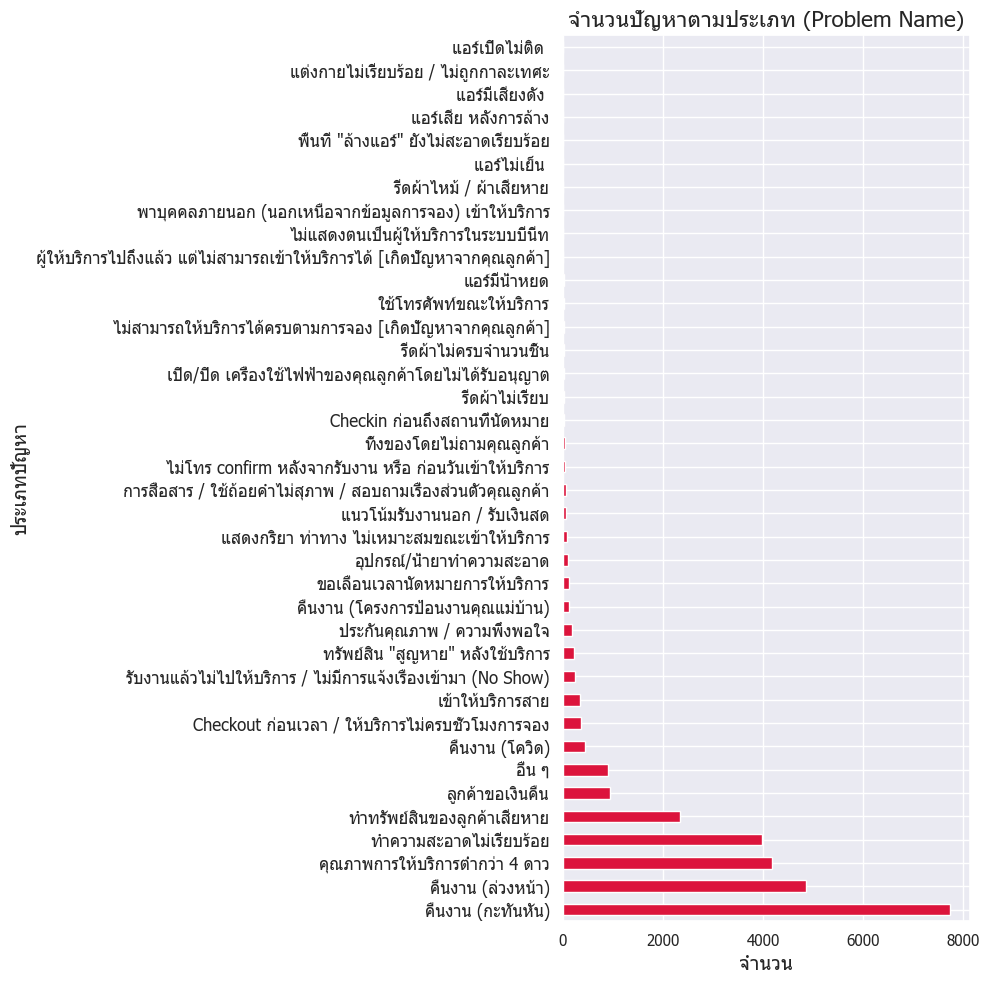

In [79]:
plt.figure(figsize=(10, 10))
sns.set(font="Tahoma")  # Use a font that supports Thai, if available on your system
data["problem_name"].value_counts().plot(kind='barh', color="crimson")  # Change to horizontal bar chart
plt.title("จำนวนปัญหาตามประเภท (Problem Name)", fontsize=16)
plt.xlabel("จำนวน", fontsize=14)  # X-axis is now count
plt.ylabel("ประเภทปัญหา", fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()

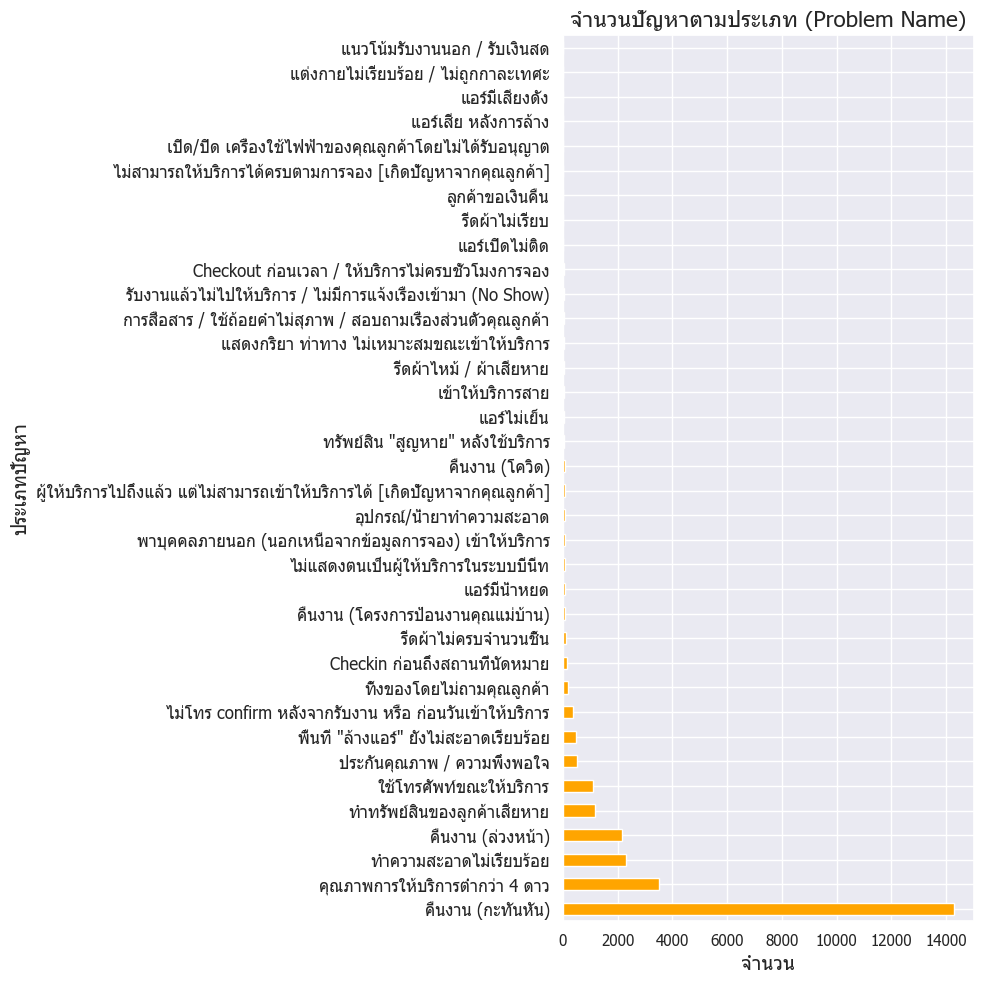

In [80]:
plt.figure(figsize=(10, 10))
sns.set(font="Tahoma")  # Use a font that supports Thai, if available on your system
data["category"].value_counts().plot(kind='barh', color="orange")  # Change to horizontal bar chart
plt.title("จำนวนปัญหาตามประเภท (Problem Name)", fontsize=16)
plt.xlabel("จำนวน", fontsize=14)  # X-axis is now count
plt.ylabel("ประเภทปัญหา", fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()